### finding holes
places around ecliptic with lowest density of bright stars (for flatfielding) 

In [4]:
inp="/home/limu/Documents/Space/QUVIK/Work/feasibility/sources/USNOb1_B2_remo.npz"
import numpy as np
cat1=np.load(inp)
klist=list(cat1.keys())

In [11]:
key1='dec_-2666_-2424'
ran=lambda a:[a.min(),a.max()]
ran(cat1[key1][0]),ran(cat1[key1][1])

([0.0007, 359.9991], [-26.6661, -24.2449])

In [5]:
kbord=np.array([[float(z)/100. for z in k.split('_')[1:3]] for k in klist])
kbord.max()

89.96

In [2]:
from astropy import coordinates as coor
from astropy import units as u


In [14]:
def get_field(b=60,l=0):
    c1=coor.GeocentricTrueEcliptic(b*u.deg,l*u.rad)
    pos1=c1.transform_to(coor.Galactic())
    qsel=(pos1.b.degree>kbord[:,0])*(pos1.b.degree<kbord[:,1])
    ksel1=klist[np.where(qsel)[0][0]]
    fld=cat1[ksel1]
    return fld[:,(fld[0]>pos1.l.degree-1)*(fld[0]<pos1.l.degree+1)]

In [16]:
allstat=[]
bpos=np.r_[:360]
for b in bpos:
    try:
        fld=get_field(b)
    except:
        print('failed for ',b)
        allstat.append([0]*8)
    else:
        allstat.append(ran(fld[0])+ran(fld[1])+[sum(fld[2]<q) for q in [10,12,14,16]])

failed for  90
failed for  270


In [17]:
arrstat=np.array(allstat).T

In [22]:
surf=(arrstat[1]-arrstat[0])*(arrstat[3]-arrstat[2])

In [25]:
sum(sel==False)

10

[array([ 15,  19,  81,  82, 156, 165, 166, 169, 170, 174, 176, 177, 178,
        186, 188, 249, 258, 357]),
 array([  1,   6,  19, 156, 168, 176, 177, 178, 179, 180, 181, 185, 186,
        189, 193, 351, 355, 357]),
 array([  5,   6,  13,  14, 165, 166, 168, 169, 170, 172, 175, 184, 185,
        186, 187, 188, 189, 205]),
 array([  5,   6,   7,  11,  12,  13, 165, 166, 167, 168, 169, 170, 172,
        184, 185, 186, 187, 188])]

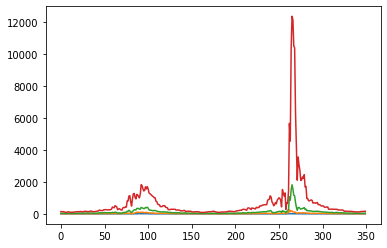

In [38]:
sel=surf>0.5
from matplotlib import pyplot as pl
low_sel=[]
for i in range(4,8):
    pl.plot(arrstat[i][sel]/surf[sel])
    plow=np.percentile(arrstat[i][sel]/surf[sel],5)
    low_sel.append(np.where(sel)[0][arrstat[i][sel]/surf[sel]<plow])
low_sel

In [41]:
set.intersection(*[set(a) for a in low_sel])

{186}

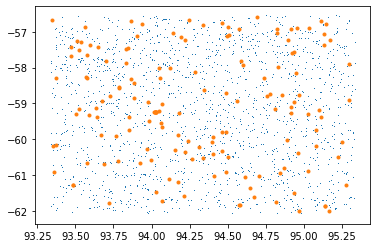

In [30]:
from matplotlib import pyplot as pl
pl.plot(fld[0],fld[1],',')
s=fld[2]<12
pl.plot(fld[0][s],fld[1][s],'.')

In [44]:
len(fld[0])

1088

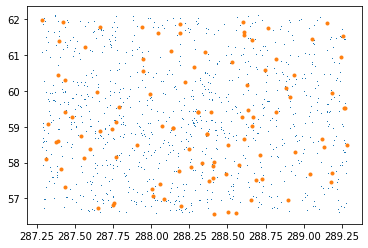

In [43]:
fld=get_field(b=186)
pl.plot(fld[0],fld[1],',')
s=fld[2]<12
pl.plot(fld[0][s],fld[1][s],'.')

In [36]:
fld=get_field(b=300)
fld.shape

(3, 3370)

In [67]:
cx=coor.GeocentricTrueEcliptic(np.r_[0:360:5]*u.deg,0*u.rad)

In [68]:
gx=cx.transform_to(coor.Galactic())

#### ecliptic in galactic coordinates  
want to select places most distant from MW

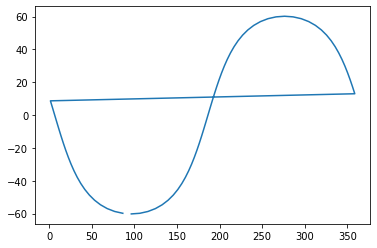

In [69]:
pl.plot(gx.l.degree,gx.b.degree)

In [71]:
pos1=gx[0]
qsel=(pos1.b.degree>kbord[:,0])*(pos1.b.degree<kbord[:,1])
ksel1=klist[np.where(qsel)[0][0]]
fld=cat1[ksel1]
fld=fld[:,(fld[0]>pos1.l.degree-1)*(fld[0]<pos1.l.degree+1)]

In [76]:
fld=fld[:,(fld[1]>pos1.b.degree-1)*(fld[1]<pos1.b.degree+1)]
ran(fld[1])

(-61.1812, -59.1901)

583

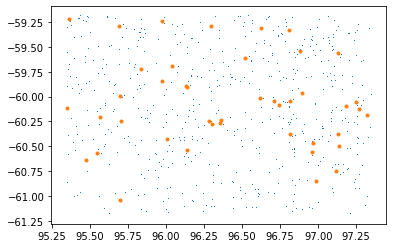

In [78]:
pl.plot(fld[0],fld[1],',')
s=fld[2]<12
pl.plot(fld[0][s],fld[1][s],'.')
len(fld[1])